DS5002
Module 05 Project 01

Ben Niemi

Key Points:
Full-time Data Scientist, potential future team. 
Ability to establish program and expand.
Salary Fluctuations due to economic effects.
Highly Competitive market.
Requesting Optimal Salary Range to be competitive and draw top talent. 
Can work offshore.
Requesting Difference between working offshore and US.
Currently a small company <50 Employees, expanding rapidly. 


Questions: 
What is the optimal and competitive salary range for a full-time data scientist?

Need to look at the central tendency, and total range before determining optimal range. Optimal range will likely be above the median but below the max, to be competitive without straining a small company's budget. Say 65th-85th percentile? Leadership ability is essential for first hire.

Things to try: max, min, median, possibility of linear regression? This feels like boxplot territory though, or distribution.

What are the differences in salaries between offshore and US?

Need to compare salary between US based and Offshore employees, calculate %difference in salary (maybe?). 

Things to try: Comparison df sliced from original, calculating %difference (research may be needed). Final comparison Bar chart? Map graphic (Definite research needed, possibly more ambitious than reasonable)?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

infile="r project data-1-1_Training.csv"

DS_hire_df=pd.read_csv(infile)
DS_hire_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [2]:
DS_hire_df['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [3]:
DS_hire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
DS_hire_df['experience_level'] = DS_hire_df['experience_level'].astype('category')
DS_hire_df['employment_type'] = DS_hire_df['employment_type'].astype('category')
DS_hire_df['salary_currency'] = DS_hire_df['salary_currency'].astype('category')
DS_hire_df['employee_residence'] = DS_hire_df['employee_residence'].astype('category')
DS_hire_df['company_size'] = pd.Categorical(DS_hire_df['company_size'], categories=['S','M','L'], ordered=True)


In [5]:
DS_hire_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
DS_hire_df.groupby(['experience_level'], observed=True)['salary_in_usd'].max()

experience_level
EN    250000
EX    600000
MI    450000
SE    412000
Name: salary_in_usd, dtype: int64

In [7]:
DS_hire_df.groupby(['experience_level'], observed=True)['salary_in_usd'].min()

experience_level
EN     4000
EX    69741
MI     2859
SE    18907
Name: salary_in_usd, dtype: int64

In [8]:
DS_hire_df.groupby(['experience_level'], observed=True)['salary_in_usd'].median()

experience_level
EN     56500.0
EX    171437.5
MI     76940.0
SE    135500.0
Name: salary_in_usd, dtype: float64

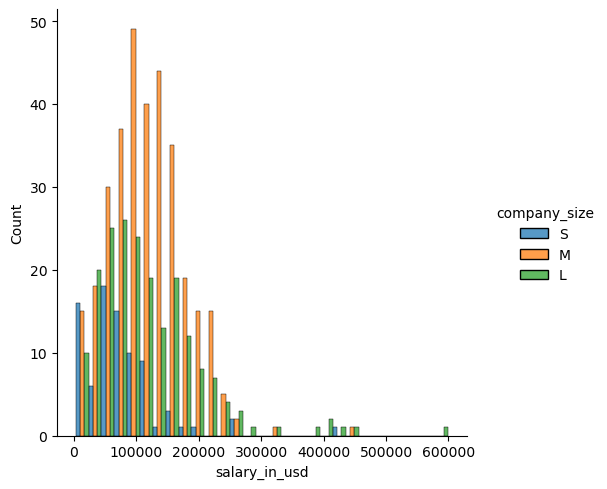

In [9]:
sns.displot(DS_hire_df, x="salary_in_usd", hue = "company_size", multiple="dodge")

In [10]:
ds_en_df = DS_hire_df[
    (DS_hire_df['experience_level'] == 'EN') &
    (DS_hire_df['employment_type'] == 'FT')].iloc[:, :]

ds_en_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
12,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
16,16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
18,18,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M


In [11]:
ds_mi_df = DS_hire_df[
    (DS_hire_df['experience_level'] == 'MI') &
    (DS_hire_df['employment_type'] == 'FT')].iloc[:, :]

ds_mi_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L


In [12]:
ds_se_df = DS_hire_df[
    (DS_hire_df['experience_level'] == 'SE') &
    (DS_hire_df['employment_type'] == 'FT')].iloc[:, :]

ds_se_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [83]:
ds_ex_df = DS_hire_df[
    (DS_hire_df['experience_level'] == 'EX') &
    (DS_hire_df['employment_type'] == 'FT')].iloc[:, :]

ds_ex_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
41,41,2020,EX,FT,Data Engineering Manager,70000,EUR,79833,ES,50,ES,L
73,73,2021,EX,FT,BI Data Analyst,150000,USD,150000,IN,100,US,L
74,74,2021,EX,FT,Head of Data,235000,USD,235000,US,100,US,L
84,84,2021,EX,FT,Director of Data Science,130000,EUR,153667,IT,100,PL,L


In [14]:
ds_en_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,79.000000,79.000000,7.900000e+01,79.000000,79.000000
mean,222.025316,2021.025316,2.887597e+05,64457.455696,68.987342
std,167.331544,0.678888,6.830354e+05,44532.396627,38.650138
min,5.000000,2020.000000,4.000000e+03,4000.000000,0.000000
25%,88.500000,2021.000000,4.650000e+04,33535.500000,50.000000
50%,178.000000,2021.000000,7.000000e+04,59102.000000,100.000000
75%,280.000000,2021.000000,1.200000e+05,85851.500000,100.000000
max,601.000000,2022.000000,4.450000e+06,250000.000000,100.000000


In [15]:
ds_mi_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,206.000000,206.000000,2.060000e+02,206.000000,206.000000
mean,270.194175,2021.276699,4.925270e+05,88403.169903,63.834951
std,171.177048,0.716455,2.489349e+06,63002.949437,42.944683
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.000000
25%,119.250000,2021.000000,5.500000e+04,49461.000000,0.000000
50%,246.000000,2021.000000,8.500000e+04,77161.000000,100.000000
75%,429.750000,2022.000000,1.350000e+05,112225.000000,100.000000
max,606.000000,2022.000000,3.040000e+07,450000.000000,100.000000


In [16]:
ds_se_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,278.000000,278.000000,2.780000e+02,278.000000,278.000000
mean,360.532374,2021.633094,2.148950e+05,139021.014388,75.719424
std,166.095414,0.596547,5.862787e+05,57670.092013,40.018322
min,1.000000,2020.000000,2.400000e+04,18907.000000,0.000000
25%,240.750000,2021.000000,1.016775e+05,100000.000000,50.000000
50%,363.500000,2022.000000,1.400000e+05,136300.000000,100.000000
75%,518.250000,2022.000000,1.750750e+05,170000.000000,100.000000
max,605.000000,2022.000000,7.000000e+06,412000.000000,100.000000


In [17]:
ds_ex_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,25.000000,25.000000,2.500000e+01,25.000000,25.000000
mean,259.680000,2021.440000,4.275150e+05,190727.720000,78.000000
std,138.043085,0.650641,1.166189e+06,110650.765059,35.590261
min,25.000000,2020.000000,5.900000e+04,69741.000000,0.000000
25%,161.000000,2021.000000,1.300000e+05,130000.000000,50.000000
50%,309.000000,2022.000000,1.750000e+05,167875.000000,100.000000
75%,344.000000,2022.000000,2.420000e+05,230000.000000,100.000000
max,483.000000,2022.000000,6.000000e+06,600000.000000,100.000000


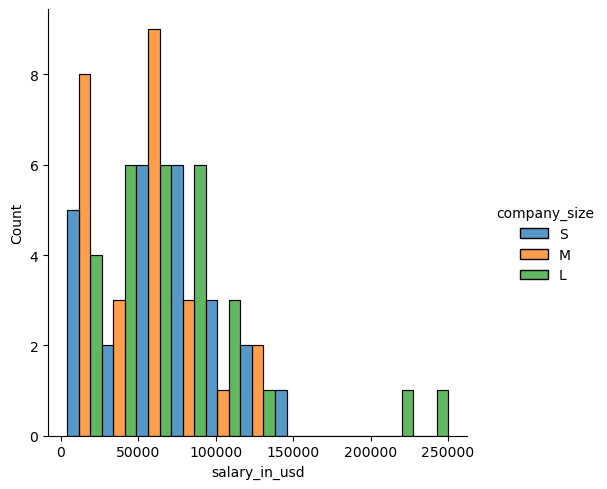

In [18]:
sns.displot(ds_en_df, x="salary_in_usd", hue = "company_size", multiple="dodge")

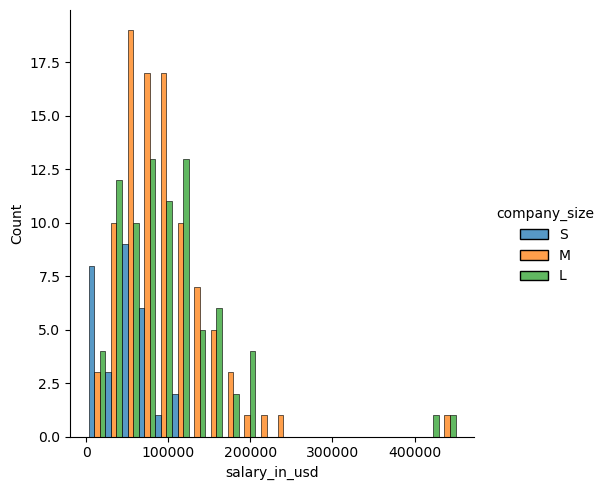

In [19]:
sns.displot(ds_mi_df, x="salary_in_usd", hue = "company_size", multiple="dodge")

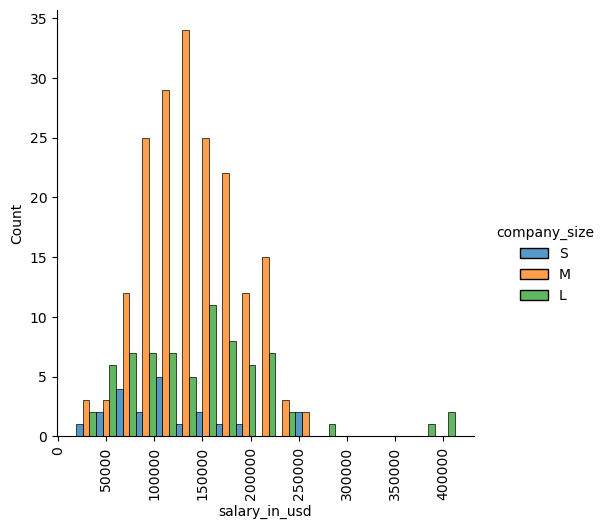

In [20]:
sns.displot(ds_se_df, x="salary_in_usd", hue = "company_size", multiple="dodge").tick_params(axis='x', labelrotation=90)

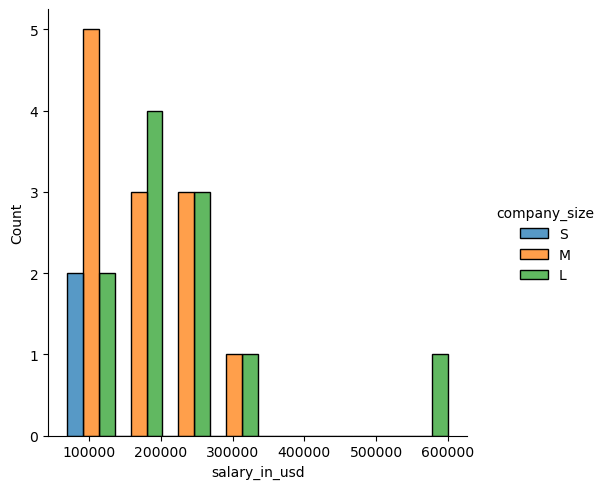

In [21]:
sns.displot(ds_ex_df, x="salary_in_usd", hue = "company_size", multiple="dodge")

After some reflection, I realized that all the job titles are technically qualified and therefore
aren't the best comparator for an analysis of salary range. 

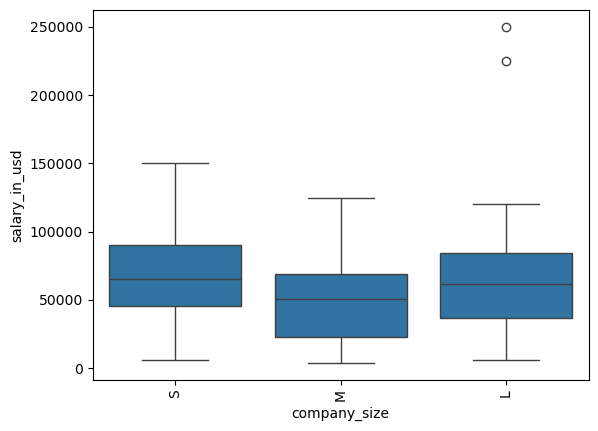

In [22]:
sns.boxplot(ds_en_df, x="company_size", y="salary_in_usd").tick_params(axis='x', labelrotation=90)

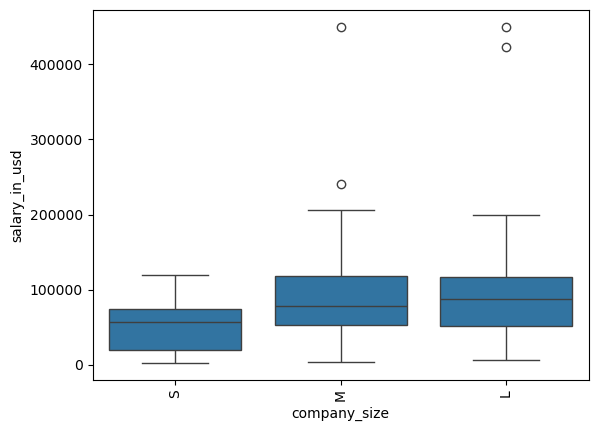

In [23]:
sns.boxplot(ds_mi_df, x="company_size", y="salary_in_usd").tick_params(axis='x', labelrotation=90)

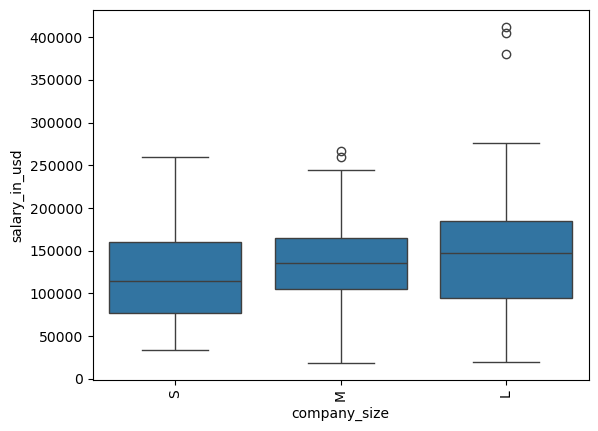

In [24]:
sns.boxplot(ds_se_df, x="company_size", y="salary_in_usd").tick_params(axis='x', labelrotation=90)

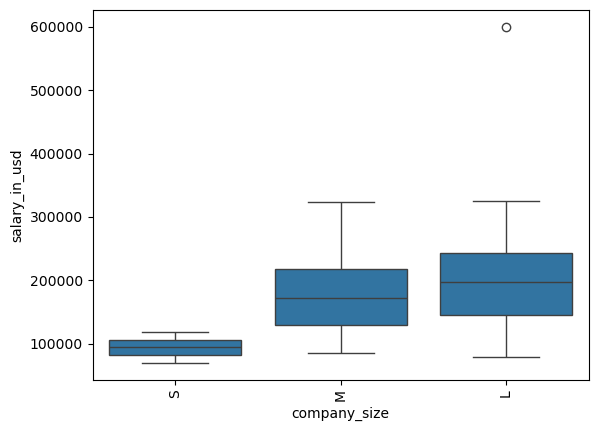

In [25]:
sns.boxplot(ds_ex_df, x="company_size", y="salary_in_usd").tick_params(axis='x', labelrotation=90)

Interesting, so the spread is relatively equivalent, with only two outliers for large companies, small companies have the largest spread but they all seem to have the same lower end. 

In [26]:
EN_percentile_65 = np.percentile(ds_en_df["salary_in_usd"],65)
print(EN_percentile_65)

75533.1


In [27]:
EN_percentile_85 = np.percentile(ds_en_df["salary_in_usd"],85)
print(EN_percentile_85)

100000.0


In [28]:
MI_percentile_60 = np.percentile(ds_mi_df["salary_in_usd"],60)
print(MI_percentile_60)

89294.0


In [47]:
MI_percentile_80 = np.percentile(ds_mi_df["salary_in_usd"],80)
print(MI_percentile_80)

120000.0


In [30]:
SE_percentile_65 = np.percentile(ds_se_df["salary_in_usd"],55)
print(SE_percentile_65)

140400.0


In [31]:
SE_percentile_85 = np.percentile(ds_se_df["salary_in_usd"],75)
print(SE_percentile_85)

170000.0


In [55]:
EX_percentile_65 = np.percentile(ds_ex_df["salary_in_usd"],35)
print(EX_percentile_65)

137738.4


In [50]:
EX_percentile_85 = np.percentile(ds_ex_df["salary_in_usd"],65)
print(EX_percentile_85)

209600.00000000003


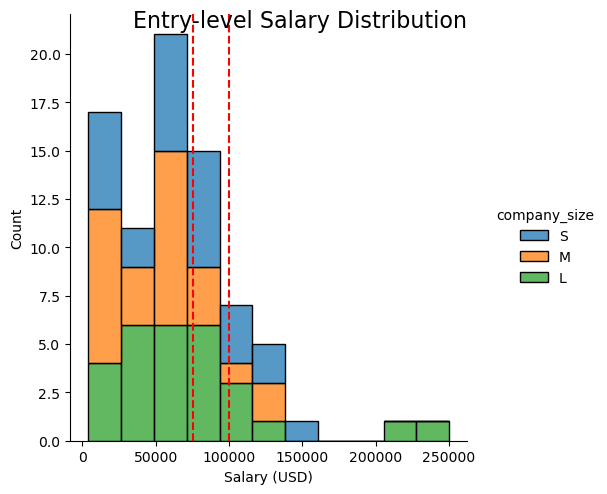

In [78]:
en_per = sns.displot(ds_en_df, x="salary_in_usd", hue = "company_size", multiple="stack")

for x in [75533.1, 100000.0]:
    en_per.ax.axvline(x=x, color='red', linestyle='--',)

en_per.fig.suptitle("Entry-level Salary Distribution", fontsize=16)
en_per.set_axis_labels("Salary (USD)", "Count")
en_per.ax.legend

plt.savefig("Entry_Level_Plot.png", dpi=300, bbox_inches='tight')
plt.show()

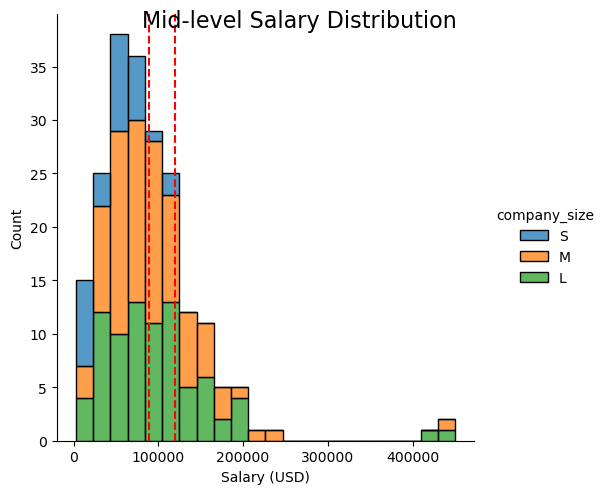

In [79]:
mi_per = sns.displot(ds_mi_df, x="salary_in_usd", hue = "company_size", multiple="stack")

for x in [89294.0, 120000.0]:
    mi_per.ax.axvline(x=x, color='red', linestyle='--',)

mi_per.fig.suptitle("Mid-level Salary Distribution", fontsize=16)
mi_per.set_axis_labels("Salary (USD)", "Count")
mi_per.ax.legend

plt.savefig("Mid_Level_Plot.png", dpi=300, bbox_inches='tight')
plt.show()

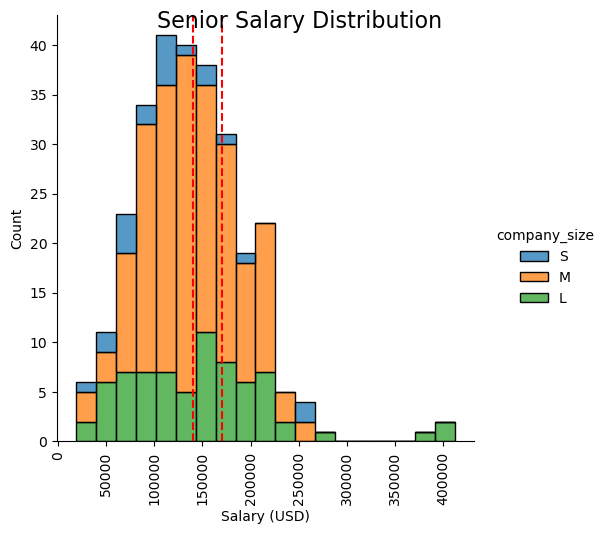

In [80]:

se_per = sns.displot(ds_se_df, x="salary_in_usd", hue = "company_size", multiple="stack").tick_params(axis='x', labelrotation=90)

for x in [140400.0, 170000.0]:
    se_per.ax.axvline(x=x, color='red', linestyle='--',)

se_per.fig.suptitle("Senior Salary Distribution", fontsize=16)
se_per.set_axis_labels("Salary (USD)", "Count")
se_per.ax.legend

plt.savefig("Senior_Level_Plot.png", dpi=300, bbox_inches='tight')
plt.show()

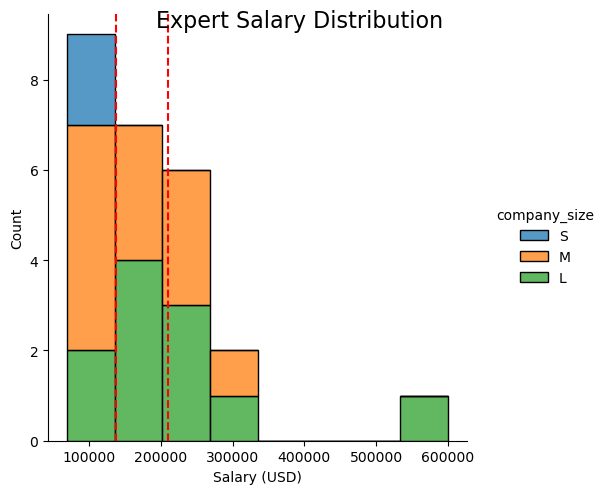

In [81]:
ex_per = sns.displot(ds_ex_df, x="salary_in_usd", hue = "company_size", multiple="stack")

for x in [137738.4, 209600.0]:
    ex_per.ax.axvline(x=x, color='red', linestyle='--',)

ex_per.fig.suptitle("Expert Salary Distribution", fontsize=16)
ex_per.set_axis_labels("Salary (USD)", "Count")
ex_per.ax.legend

plt.savefig("Expert_Level_Plot.png", dpi=300, bbox_inches='tight')
plt.show()

To compare US vs offshore

Comparing US Salaries vs offshore salaries


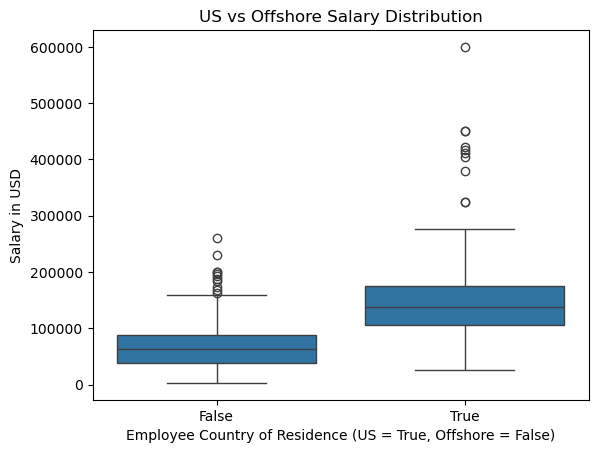

In [91]:
us_df = DS_hire_df[DS_hire_df['employee_residence'] == 'US']
offshore_df = DS_hire_df[DS_hire_df['employee_residence'] != 'US']

sns.boxplot(
    data=DS_hire_df,
    x=DS_hire_df['employee_residence'] == 'US',    
    y="salary_in_usd"
)

plt.xlabel("Employee Country of Residence (US = True, Offshore = False)")
plt.ylabel("Salary in USD")
plt.title("US vs Offshore Salary Distribution")

plt.savefig("US Vs Offshore.png", dpi=300, bbox_inches='tight')
plt.show()